<a href="https://colab.research.google.com/github/athanaseH12/PCA-Cluster-analysis-Timeseries-and-Wavelet-analysis-in-Python/blob/main/Group_8_RMCS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Research Methods for Climate Sciences


### Group 8 : Cape Town Group (Cluster analysis, Timeseresies analysis, Principle component analysis and Wavelet analysis).


-----------------------------------------------------------

# TASK 1 AND 2

---------------------------------------------------------

In [1]:
# IMPORTANT ! : Install this packages for PCA and Restart the Kernel 

In [2]:
pip install factor_analyzer 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 KB 2.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.7/202.7 KB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 KB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 61.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 KB 18.7 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42034 sha256=1b635f9bd576cd4cac36dab66a0607bf991e65964e17ccfdca84a957b98252f5
  Stored in directory: /root/.cache/pip/wheels/6d/32/bd/460a71becd83f7d77152f437c2fd451f5c87bc19cfcdbfcd24
Successfully built factor_analyzer


#### Libraries

In [3]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import FactorAnalysis

####   Preprosessing the Data    

In [7]:
X=pd.read_csv("/content/Group_8_RMCS1.csv")

In [8]:
X.head()

,Years,PRED,PETD,CLDD,DTRD,TMPD,TMND,TMXD,VAPD,WETD
0,1960,197.9,1.6,47.6,7.9,13.5,9.6,17.5,11.8,13.55
1,1961,142.0,1.7,51.0,8.3,13.4,9.3,17.6,11.5,12.94
2,1962,326.5,1.2,58.8,5.7,12.8,10.0,15.7,12.3,19.33
3,1963,91.7,1.7,48.4,9.0,13.8,9.3,18.3,11.9,11.13
4,1964,158.4,1.5,53.6,8.0,12.1,8.1,16.1,10.8,14.38


In [9]:
Years=list(X.Years.values)

In [10]:
Y=X.set_index('Years')

In [11]:
Labels= list(Y.columns)

#### Standardizing and preparing the dataset

In [12]:
Y_scaled=scale(Y.values) 

In [13]:
Y_scaled=Y_scaled.T

____________________________

## Cluster Analysis

_______________________

#### Performing hierarchical clustering of the observations (variables) using Ward method, single and average linkage 


##### Single

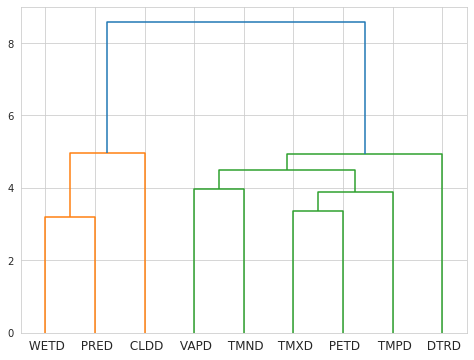

In [14]:
import seaborn as sns
sns.set_style("whitegrid")

linked = linkage(Y_scaled, 'single')

labelList = Labels

plt.figure(figsize=(8, 6))

dendrogram(linked,orientation='top',labels=labelList,distance_sort='descending',show_leaf_counts=True)
plt.savefig('Single.png')
plt.show()


##### Average

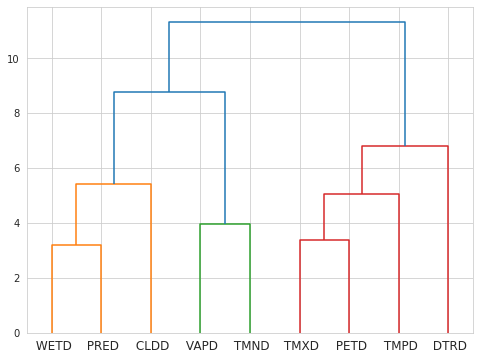

In [15]:
linked = linkage(Y_scaled, 'average')

labelList = Labels

plt.figure(figsize=(8, 6))
dendrogram(linked,orientation='top',labels=labelList,distance_sort='descending',show_leaf_counts=True)
plt.savefig('Average.png')
plt.show()


##### Wards Algorithm

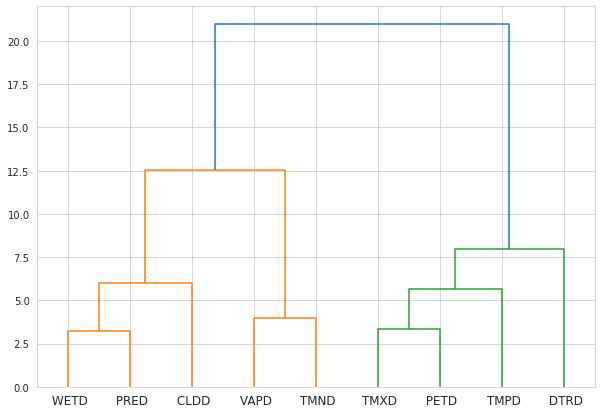

In [16]:
linked = linkage(Y_scaled, 'ward')

labelList = Labels

plt.figure(figsize=(10, 7))
dendrogram(linked,orientation='top',labels=labelList,distance_sort='descending',show_leaf_counts=True)
plt.savefig('Ward.png')
plt.show()


___________________

## Principal Component Analysis

________________

### Unrotated PCA

In [17]:
Y_scaled=Y_scaled.T

In [18]:
pca1 = FactorAnalyzer(n_factors=4, method='principal', rotation=None)
pca1.fit(Y_scaled)

FactorAnalyzer(method='principal', n_factors=4, rotation=None,
               rotation_kwargs={})

In [19]:
eig1 = pca1.get_eigenvalues()[0]
eig1

array([ 4.95684037e+00,  2.94398388e+00,  4.74543806e-01,  3.75538848e-01,
        1.51494352e-01,  8.42761807e-02,  1.28205533e-02,  5.02015261e-04,
       -6.93889390e-17])

##### Scree Plot

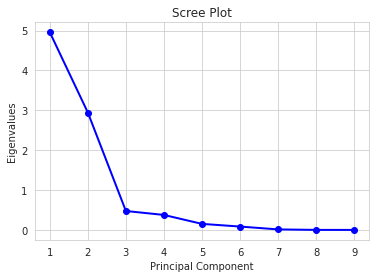

In [20]:
PC_values1 = np.arange(pca1.n_factors+5)+1
plt.plot(PC_values1, eig1, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalues')
plt.savefig('scree.png')
plt.show()

##### Loadings

In [21]:
loadings1 = pd.DataFrame(pca1.loadings_.round(2), columns=['PC1',"PC2","PC3","PC4"], index=Labels)
loadings1=loadings1.style.applymap(lambda x: 'color :red' if abs(x)>0.7 and x<1 else '')
loadings1

,PC1,PC2,PC3,PC4
PRED,-0.890000,0.130000,0.210000,0.350000
PETD,0.910000,0.180000,0.360000,-0.020000
CLDD,-0.830000,0.170000,0.210000,-0.450000
DTRD,0.900000,-0.350000,0.080000,0.100000
TMPD,0.480000,0.870000,0.100000,-0.010000
TMND,-0.110000,0.980000,0.040000,-0.060000
TMXD,0.850000,0.490000,0.120000,0.050000
VAPD,-0.240000,0.880000,-0.370000,0.090000
WETD,-0.900000,0.120000,0.300000,0.180000


##### Explained Variance

In [22]:
print(pca1.get_factor_variance()[0])

[4.95684037 2.94398388 0.47454381 0.37553885]


### Rotated PCA

In [23]:
pca2 = FactorAnalyzer(n_factors=4, method='principal', rotation="varimax")
pca2.fit(Y_scaled)

FactorAnalyzer(method='principal', n_factors=4, rotation='varimax',
               rotation_kwargs={})

In [ ]:
eig2 = pca2.get_eigenvalues()[0]
eig2

array([ 4.95684037e+00,  2.94398388e+00,  4.74543806e-01,  3.75538848e-01,
        1.51494352e-01,  8.42761807e-02,  1.28205533e-02,  5.02015261e-04,
       -6.93889390e-17])

##### Scree Plot

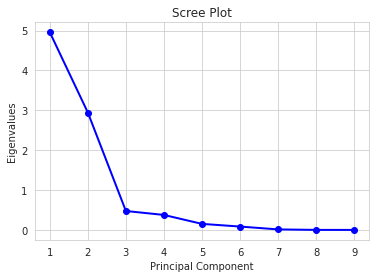

In [ ]:
PC_values2 = np.arange(pca2.n_factors+5)+1
plt.plot(PC_values2, eig2, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalues')
plt.show()

##### Loadings

In [24]:
loadings2 = pd.DataFrame(pca2.loadings_.round(2), columns=['RC1',"RC2","RC3","RC4"], index=Labels)
loadings2=loadings2.style.applymap(lambda x: 'color :red' if abs(x)>0.7 and x<1 else '')
loadings2

,RC1,RC2,RC3,RC4
PRED,0.900000,0.100000,-0.320000,0.180000
PETD,-0.440000,0.030000,0.850000,-0.250000
CLDD,0.440000,0.110000,-0.290000,0.820000
DTRD,-0.560000,-0.380000,0.500000,-0.490000
TMPD,-0.190000,0.780000,0.590000,-0.070000
TMND,0.170000,0.920000,0.230000,0.230000
TMXD,-0.440000,0.400000,0.730000,-0.320000
VAPD,0.130000,0.960000,-0.180000,0.010000
WETD,0.870000,0.060000,-0.270000,0.350000


##### Explained Variance

In [25]:
print(pca2.get_factor_variance()[0])

[2.54687926 2.7067382  2.20380349 1.29348594]


_______________________

# TASK 3 AND 4

_____________________________________________

## TIme series analysis part 1 (Auto-correlation and Cross-correlation)

## Climate Data
### Data extraction and  cleaning data


#### Libraires

In [26]:
pip install scaleogram

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
pip install mat4py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
%matplotlib inline
import numpy as np
import pandas as pd
import pywt
import seaborn as sns
import scaleogram as scg 
import matplotlib.pyplot as plt
import matplotlib.gridspec as GridSpec
from mat4py import loadmat
from scipy.fftpack import fft

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from statsmodels.graphics.tsaplots import *
from sklearn.preprocessing import scale
from numpy import polyfit 
from scipy import *
import matplotlib.dates as mdates
from scipy import signal
#pip install git+https://github.com/tweepy/tweepy.git
#pip install git+https://github.com/aaren/wavelets
#pip install kPyWavelet
# import kPyWavelet as wavelet

### Data

In [30]:
data=pd.read_csv('/content/Group_8_RMCS2.csv')
data

,PRED,PETD,CLDD,DTRD,TMPD,TMND,TMXD,VAPD,WETD
0,7.0,5.4,30.6,10.6,19.8,14.5,25.1,15.8,2.40
1,10.6,5.3,27.3,11.5,20.5,14.8,26.3,16.5,3.14
2,37.7,4.0,34.2,10.5,18.3,13.1,23.6,14.7,5.64
3,42.1,2.8,39.4,9.8,16.3,11.4,21.2,13.3,7.58
4,114.0,1.8,48.6,8.0,13.8,9.8,17.8,12.1,12.66
...,...,...,...,...,...,...,...,...,...
607,44.2,2.7,41.1,10.2,13.8,8.7,18.9,10.4,9.69
608,30.8,3.3,42.4,9.7,14.9,10.1,19.8,11.3,7.52
609,34.1,3.8,43.7,9.6,15.6,10.8,20.4,12.4,10.15
610,33.2,5.0,36.4,9.9,17.9,13.0,22.9,13.6,6.27


In [31]:
dti =pd.date_range("1960-01-01", periods=12*51, freq="M")

In [32]:
data["Date"]=dti
data

,PRED,PETD,CLDD,DTRD,TMPD,TMND,TMXD,VAPD,WETD,Date
0,7.0,5.4,30.6,10.6,19.8,14.5,25.1,15.8,2.40,1960-01-31
1,10.6,5.3,27.3,11.5,20.5,14.8,26.3,16.5,3.14,1960-02-29
2,37.7,4.0,34.2,10.5,18.3,13.1,23.6,14.7,5.64,1960-03-31
3,42.1,2.8,39.4,9.8,16.3,11.4,21.2,13.3,7.58,1960-04-30
4,114.0,1.8,48.6,8.0,13.8,9.8,17.8,12.1,12.66,1960-05-31
...,...,...,...,...,...,...,...,...,...,...
607,44.2,2.7,41.1,10.2,13.8,8.7,18.9,10.4,9.69,2010-08-31
608,30.8,3.3,42.4,9.7,14.9,10.1,19.8,11.3,7.52,2010-09-30
609,34.1,3.8,43.7,9.6,15.6,10.8,20.4,12.4,10.15,2010-10-31
610,33.2,5.0,36.4,9.9,17.9,13.0,22.9,13.6,6.27,2010-11-30


### Time series plot for precipitation

### Plot the time series

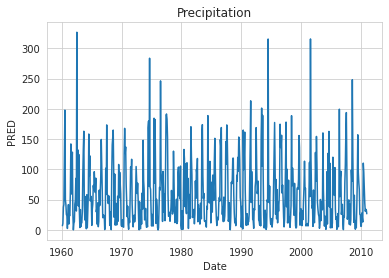

In [81]:
#plt.figure(figsize=(10, 10))
sns.lineplot(x = 'Date', y ='PRED',data = data).set(title='Precipitation');

#### Checking for trend and Detrending

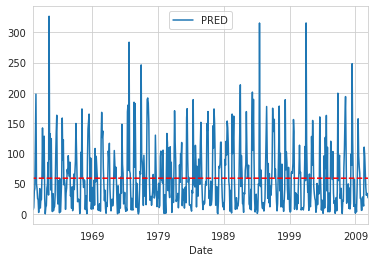

In [88]:
x=mdates.date2num(data["Date"])
y=data["PRED"]
z=np.polyfit(x,y,1)
p=np.poly1d(z)
data.plot("Date", "PRED")
plt.plot(x, p(x), "r--");



### Time series plot for precipitation

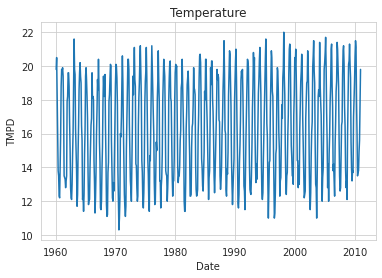

In [37]:
#plt.figure(figsize=(15, 10))
sns.lineplot(x = 'Date', y ='TMPD',data = data).set(title='Temperature');

#### Checking for trend and Detrending

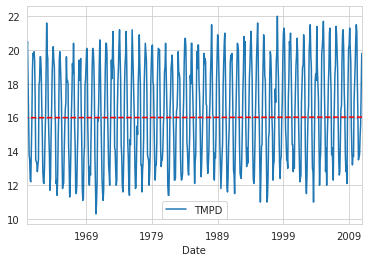

In [85]:
x=mdates.date2num(data["Date"])
y=data["TMPD"]
z=np.polyfit(x,y,1)
p=np.poly1d(z)
data.plot("Date", "TMPD")
plt.plot(x, p(x), "r--");


### Auto-correlation 

In [40]:
T=data['TMPD']

In [41]:
P_scaled=scale(data['PRED'].values) 
T_scaled=scale(data['TMPD'].values)

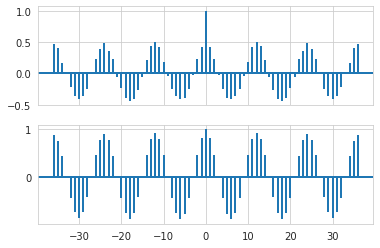

In [74]:
import matplotlib.pyplot as plt
import numpy as np


# Fixing random state for reproducibility

np.random.seed(19680801)


# # x, y = np.random.randn(2, 100)
fig, [ax2,ax3] = plt.subplots(2, 1, sharex=True)
# ax1.xcorr(P_scaled, T_scaled, usevlines=True, maxlags=27, normed=True, lw=2)
# ax1.grid(True)

ax2.acorr(P_scaled, usevlines=True, normed=True, maxlags=36, lw=2)
ax2.grid(True)

ax3.acorr(T_scaled, usevlines=True, normed=True, maxlags=36, lw=2)
ax3.grid(True)

plt.show()

### Cross-correlation

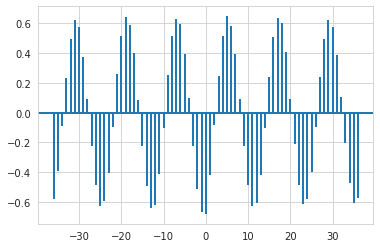

In [43]:
# fig, [ax1] = plt.subplots(1, 1, sharex=True)
plt.xcorr(P_scaled, T_scaled, usevlines=True, maxlags=36, normed=True, lw=2)
plt.grid(True)

## Time series analysis part 2 (Spectral analysis and Wavelet analysis)

### spectral analysis for precipitation

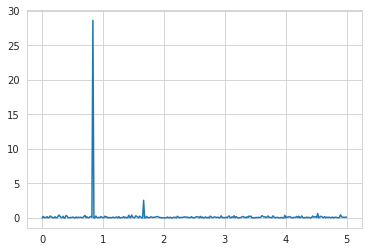

In [72]:
f, Pxx_den = signal.periodogram(P_scaled, 10)
plt.plot(f,Pxx_den);


### spectral analysis for temperature

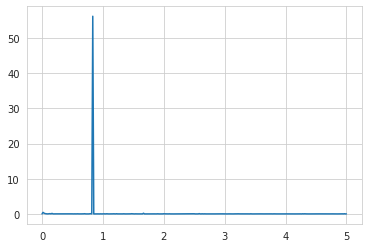

In [71]:
f, Pxx_den = signal.periodogram(T_scaled, 10)
plt.plot(f,Pxx_den);

In [51]:
pip install pycwt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 753.5/753.5 KB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 70.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.2 which is incompatible.


### wavelet analysis for precipitation 

In [52]:
from __future__ import division
import numpy
from matplotlib import pyplot

import pycwt as wavelet
from pycwt.helpers import find

In [53]:
dat = P_scaled # Decomment this line and comment the next for Precipitation analysis 
# dat = T_scaled 
title = 'Time series plot'
label = 'Precipitation'
units = ''
t0 = 1960.0
dt = 1/12  # In years

In [54]:
N = dat.size
t = numpy.arange(0, N) * dt + t0

In [55]:
p = numpy.polyfit(t - t0, dat, 1)
dat_notrend = dat - numpy.polyval(p, t - t0)
std = dat_notrend.std()  # Standard deviation
var = std ** 2  # Variance
dat_norm = dat_notrend / std  # Normalized dataset

In [56]:
mother = wavelet.Morlet(6) # Change to Paul, DOG here !
s0 = 2 * dt  # Starting scale, in this case 2 * 0.25 years = 6 months
dj = 1 / 12  # Twelve sub-octaves per octaves
J = 7 / dj  # Seven powers of two with dj sub-octaves
alpha, _, _ = wavelet.ar1(dat)  # Lag-1 autocorrelation for red noise

In [57]:
wave, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(dat_norm, dt, dj, s0, J,
                                                      mother)
iwave = wavelet.icwt(wave, scales, dt, dj, mother) * std

In [58]:
power = (numpy.abs(wave)) ** 2
fft_power = numpy.abs(fft) ** 2
period = 1 / freqs

In [59]:
power /= scales[:, None]

In [60]:
signif, fft_theor = wavelet.significance(1.0, dt, scales, 0, alpha,
                                         significance_level=0.95,
                                         wavelet=mother)
sig95 = numpy.ones([1, N]) * signif[:, None]
sig95 = power / sig95

In [61]:
glbl_power = power.mean(axis=1)
dof = N - scales  # Correction for padding at edges
glbl_signif, tmp = wavelet.significance(var, dt, scales, 1, alpha,
                                        significance_level=0.95, dof=dof,
                                        wavelet=mother)

In [62]:
sel = find((period >= 2) & (period < 8))
Cdelta = mother.cdelta
scale_avg = (scales * numpy.ones((N, 1))).transpose()
scale_avg = power / scale_avg  # As in Torrence and Compo (1998) equation 24
scale_avg = var * dj * dt / Cdelta * scale_avg[sel, :].sum(axis=0)
scale_avg_signif, tmp = wavelet.significance(var, dt, scales, 2, alpha,
                                             significance_level=0.95,
                                             dof=[scales[sel[0]],
                                                  scales[sel[-1]]],
                                             wavelet=mother)

/usr/local/lib/python3.9/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


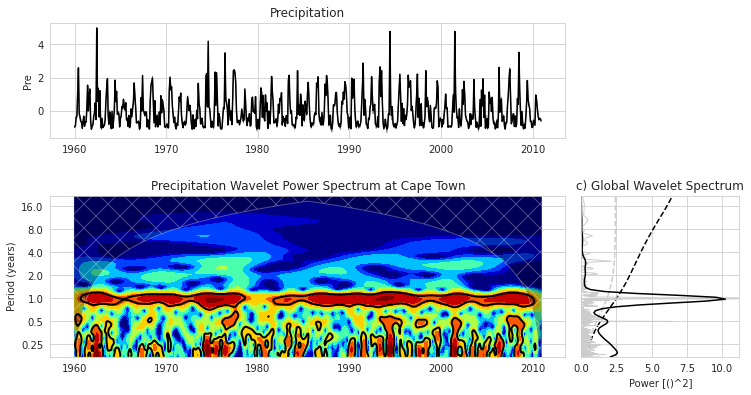

In [89]:
# Prepare the figure
pyplot.close('all')
pyplot.ioff()
figprops = dict(figsize=(11, 8), dpi=72)
fig = pyplot.figure(**figprops)


# First sub-plot, the original time series anomaly and inverse wavelet
# transform.
ax = pyplot.axes([0.1, 0.75, 0.65, 0.2])
ax.plot(t, iwave, '-', linewidth=1, color=[0.5, 0.5, 0.5])
ax.plot(t, dat, 'k', linewidth=1.5)
ax.set_title("Precipitation")
ax.set_ylabel('Pre')


# Second sub-plot, the normalized wavelet power spectrum and significance
# level contour lines and cone of influece hatched area. Note that period
# scale is logarithmic.


bx = pyplot.axes([0.1, 0.37, 0.65, 0.28], sharex=ax)
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16]
bx.contourf(t, numpy.log2(period), numpy.log2(power), numpy.log2(levels),
            extend='both', cmap=pyplot.cm.jet)
extent = [t.min(), t.max(), 0, max(period)]
bx.contour(t, numpy.log2(period), sig95, [-99, 1], colors='k', linewidths=2,
           extent=extent)
bx.fill(numpy.concatenate([t, t[-1:] + dt, t[-1:] + dt,
                           t[:1] - dt, t[:1] - dt]),
        numpy.concatenate([numpy.log2(coi), [1e-9], numpy.log2(period[-1:]),
                           numpy.log2(period[-1:]), [1e-9]]),
        'k', alpha=0.3, hatch='x')
bx.set_title("Precipitation Wavelet Power Spectrum at Cape Town")
bx.set_ylabel('Period (years)')
#
Yticks = 2 ** numpy.arange(numpy.ceil(numpy.log2(period.min())),
                           numpy.ceil(numpy.log2(period.max())))
bx.set_yticks(numpy.log2(Yticks))
bx.set_yticklabels(Yticks)


# Third sub-plot, the global wavelet and Fourier power spectra and theoretical
# noise spectra. Note that period scale is logarithmic.
cx = pyplot.axes([0.77, 0.37, 0.2, 0.28], sharey=bx)
cx.plot(glbl_signif, numpy.log2(period), 'k--')
cx.plot(var * fft_theor, numpy.log2(period), '--', color='#cccccc')
cx.plot(var * fft_power, numpy.log2(1./fftfreqs), '-', color='#cccccc',
        linewidth=1.)
cx.plot(var * glbl_power, numpy.log2(period), 'k-', linewidth=1.5)
cx.set_title('c) Global Wavelet Spectrum')
cx.set_xlabel(r'Power [({})^2]'.format(units))
cx.set_xlim([0, glbl_power.max() + var])
cx.set_ylim(numpy.log2([period.min(), period.max()]))
cx.set_yticks(numpy.log2(Yticks))
cx.set_yticklabels(Yticks)
pyplot.setp(cx.get_yticklabels(), visible=False)


plt.savefig('wavelet2_py.png')
pyplot.show()